In [46]:
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('stopwords')
import string
import numpy as np
import random

words_to_filter = ['Reuters']

docs_StarWars = ["Count Dooku Voice Actor Corey Burton Tried Something New on Star Wars: Tales of the Jedi", "'Andor' Episode 8 Explained: 'Rogue One' Cameos and a 'Star Wars' Hell Prison - CNET", "Andor Gave Us the Gayest Screen Fade in Star Wars History", "Ahsoka Tano Herself, Ashley Eckstein, Breaks Down Star Wars: Tales of the Jedi", "Star Wars: The Deckbuilding Game could rule the galaxy of 2-player card games", "There's a new Star Wars project from Damon Lindelof in the works", "Star Wars Fatigue Shouldn't Stop You From Watching 'Andor' - CNET", "'Andor' is the best 'Star Wars' show since 'The Mandalorian' — but the least popular", "Star Wars characters take over Mexico City - Reuters"]

docs_China = ["Alarmed by suicide attack, China and Pakistan join hands in probe - Reuters", "Death of boy in lockdown fuels backlash against China's zero-Covid policy", "UPDATE 2-Hong Kong stocks tumble as Xi appointments fan economic fears; yuan weakens", "China supports central SOEs to issue tech innovation bonds - Reuters"]

docs_WorldCup = ["World Cup: FIFA head comments on beer ban - CP24", "T20 World Cup: Bangladesh bowlers impress to secure victory over Netherlands", "Canada's goalkeeper Crepeau to miss World Cup with broken leg - Reuters", "World Cup stadium alcohol ban emblematic of contradictions", "T20 World Cup: Pakistan beat Netherlands to avoid elimination"]

docs_Ukraine = ["Ukraine war: Wagner chief Prigozhin defends brutal killing video", "Chance for peace in Ukraine, says France's Macron - Reuters", "Ukraine nuclear agency thickens alleged dirty bomb plot - CTV News", "Ukraine war round-up: Missile blast in Poland and Zambian family's grief", "Ukraine round-up: Refugees urged to stay away and 'dirty bomb' claims", "Russia says Ukraine hands over 50 prisoners of war - Reuters.com"]

docs = [docs_StarWars, docs_China, docs_WorldCup, docs_Ukraine]
docs = list(np.concatenate(docs).flat)
random.shuffle(docs)

lemmatizer = nltk.stem.WordNetLemmatizer()
tokenizer = nltk.tokenize.RegexpTokenizer(r'\w+')
stop_words = nltk.corpus.stopwords.words('english')

def clean_text(text):
    text = "".join([char for char in text if char not in string.punctuation])
    text = lemmatizer.lemmatize(text)
    text = tokenizer.tokenize(text)
    text = [word for word in text if word not in stop_words]
    text = ' '.join(text)
    text = text.lower()

    return text

docs = [clean_text(doc) for doc in docs]
print(docs)

['canadas goalkeeper crepeau miss world cup broken leg reuters', 'world cup stadium alcohol ban emblematic contradictions', 'andor episode 8 explained rogue one cameos star wars hell prison cnet', 'ukraine roundup refugees urged stay away dirty bomb claims', 'ukraine nuclear agency thickens alleged dirty bomb plot ctv news', 'death boy lockdown fuels backlash chinas zerocovid policy', 'world cup fifa head comments beer ban cp24', 'count dooku voice actor corey burton tried something new star wars tales jedi', 'star wars characters take mexico city reuters', 'update 2hong kong stocks tumble xi appointments fan economic fears yuan weakens', 'ukraine war roundup missile blast poland zambian familys grief', 'alarmed suicide attack china pakistan join hands probe reuters', 't20 world cup pakistan beat netherlands avoid elimination', 'theres new star wars project damon lindelof works', 'ahsoka tano herself ashley eckstein breaks down star wars tales jedi', 'chance peace ukraine says frances 

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\steem\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\steem\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\steem\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [47]:
import sklearn as sk
import pandas as pd

print(docs)
vectorizer = sk.feature_extraction.text.TfidfVectorizer(use_idf=True)
docs_vectors = vectorizer.fit_transform(docs)

docs_vectors = docs_vectors.toarray()
docs_vectors = pd.DataFrame(docs_vectors)
docs_vectors = docs_vectors - docs_vectors.mean()

['canadas goalkeeper crepeau miss world cup broken leg reuters', 'world cup stadium alcohol ban emblematic contradictions', 'andor episode 8 explained rogue one cameos star wars hell prison cnet', 'ukraine roundup refugees urged stay away dirty bomb claims', 'ukraine nuclear agency thickens alleged dirty bomb plot ctv news', 'death boy lockdown fuels backlash chinas zerocovid policy', 'world cup fifa head comments beer ban cp24', 'count dooku voice actor corey burton tried something new star wars tales jedi', 'star wars characters take mexico city reuters', 'update 2hong kong stocks tumble xi appointments fan economic fears yuan weakens', 'ukraine war roundup missile blast poland zambian familys grief', 'alarmed suicide attack china pakistan join hands probe reuters', 't20 world cup pakistan beat netherlands avoid elimination', 'theres new star wars project damon lindelof works', 'ahsoka tano herself ashley eckstein breaks down star wars tales jedi', 'chance peace ukraine says frances 

PCA explained variance: 0.14940704372740998 %
Group 1
                                                    0
3   ukraine roundup refugees urged stay away dirty...
4   ukraine nuclear agency thickens alleged dirty ...
10  ukraine war roundup missile blast poland zambi...
15   chance peace ukraine says frances macron reuters
16  russia says ukraine hands 50 prisoners war reu...
17  ukraine war wagner chief prigozhin defends bru...
Group 2
                                                    0
2   andor episode 8 explained rogue one cameos sta...
7   count dooku voice actor corey burton tried som...
8       star wars characters take mexico city reuters
13  theres new star wars project damon lindelof works
14  ahsoka tano herself ashley eckstein breaks dow...
19  andor best star wars show since the mandaloria...
21  andor gave us gayest screen fade star wars his...
22  star wars the deckbuilding game could rule gal...
23  star wars fatigue shouldnt stop you from watch...
Group 3
            

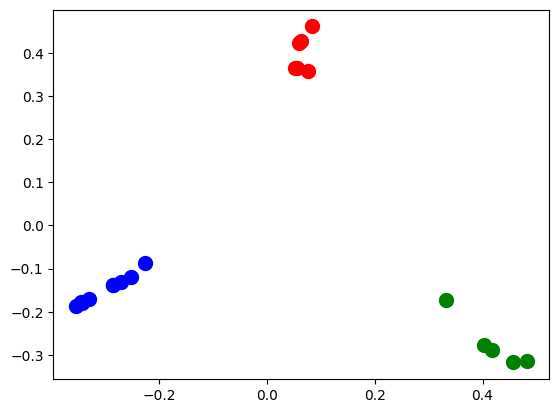

In [48]:
import numpy as np
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
pca.fit(docs_vectors)
print("PCA explained variance:", sum(pca.explained_variance_ratio_), "%")

fitted_PCA = pd.DataFrame(pca.fit_transform(docs_vectors))

# clusters = KMeans(n_clusters=4).fit(fitted_PCA)
clusters = AgglomerativeClustering(linkage='ward', distance_threshold=1.5, n_clusters=None).fit(fitted_PCA)

y_clusters = clusters.fit_predict(docs_vectors)

plt.scatter(fitted_PCA[y_clusters==0][0], fitted_PCA[y_clusters==0][1], s=100, c='red', label ='Cluster 1')
plt.scatter(fitted_PCA[y_clusters==1][0], fitted_PCA[y_clusters==1][1], s=100, c='blue', label ='Cluster 2')
plt.scatter(fitted_PCA[y_clusters==2][0], fitted_PCA[y_clusters==2][1], s=100, c='green', label ='Cluster 3')

docs_pd = pd.DataFrame(docs)

group1 = docs_pd[y_clusters==0]

print("Group 1")
print(group1)

print("Group 2")
print(docs_pd[y_clusters==1])

print("Group 3")
print(docs_pd[y_clusters==2])

In [49]:
from sentence_transformers import SentenceTransformer
nltk.download('punkt')

transformer = SentenceTransformer('all-mpnet-base-v2')

group1 = group1.values.tolist()
group1 = list(np.concatenate(group1).flat)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\steem\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [50]:
print(group1)

groupEmbeddings = transformer.encode(group1)

['ukraine roundup refugees urged stay away dirty bomb claims', 'ukraine nuclear agency thickens alleged dirty bomb plot ctv news', 'ukraine war roundup missile blast poland zambian familys grief', 'chance peace ukraine says frances macron reuters', 'russia says ukraine hands 50 prisoners war reuterscom', 'ukraine war wagner chief prigozhin defends brutal killing video']
